## Reading and Understanding the data

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels 
import statsmodels.api as sm 
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [3]:
advertising = pd.read_csv('advertising.csv')
advertising.head(5)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [4]:
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
advertising.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [6]:
advertising.shape

(200, 4)

## Visualize the data

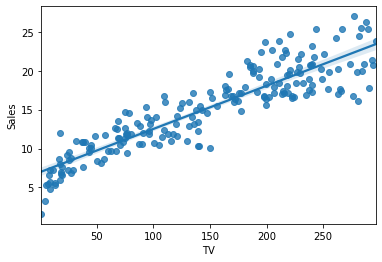

In [7]:
sns.regplot(x='TV', y='Sales', data = advertising)
plt.show()

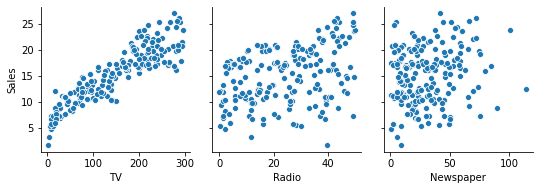

In [8]:
sns.pairplot(data=advertising, x_vars=['TV','Radio', 'Newspaper'], y_vars=['Sales'])
plt.show()

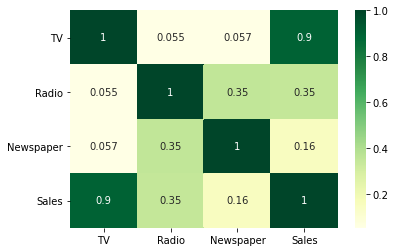

In [9]:
sns.heatmap(advertising.corr(), annot=True, cmap='YlGn')
plt.show()

As is visible from the pairplot and the heatmap, the variable `TV` seems to be most correlated with `Sales`. So let's go ahead and perform simple linear regression using `TV` as our feature variable.

---
##  Performing Simple Linear Regression

Equation of linear regression<br>
$y = c + m_1x_1 + m_2x_2 + ... + m_nx_n$

-  $y$ is the response
-  $c$ is the intercept
-  $m_1$ is the coefficient for the first feature
-  $m_n$ is the coefficient for the nth feature<br>

In our case:

$y = c + m_1 \times TV$

The $m$ values are called the model **coefficients** or **model parameters**.

---

### Steps to build a model using `statsmodels`:
- Create X and y
- Create train and test sets(70-30/80-20)
- Train your models on the training set(i.e. learn the co-efficients)
- Evaluate the model(train and test set)

In [10]:
# create X and y
X = advertising['TV']
y = advertising['Sales']

In [11]:
# train and test data 
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.70, random_state=100)

In [12]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(140,)
(60,)
(140,)
(60,)


- Now the model is splitted into 70% train set and 30% test data

In [13]:
# training the model
X_train_sm = sm.add_constant(X_train)
X_train_sm.head(5)

,const,TV
74,1.0,213.4
3,1.0,151.5
185,1.0,205.0
26,1.0,142.9
90,1.0,134.3


In [14]:
# fitting the model
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.params

const    6.948683
TV       0.054546
dtype: float64

- It says that `Sales = 6.94 + 0.05 TV` as a linear regression. It means if the TV advertising is increased by 1 unit, sales will increase by 0.05 units
- Const c = 6.94, it means if slope is 0, then sales will be 6.94

In [15]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Wed, 02 Dec 2020   Prob (F-statistic):           1.52e-52
Time:                        17:52:25   Log-Likelihood:                -321.12
No. Observations:                 140   AIC:                             646.2
Df Residuals:                     138   BIC:                             652.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9487      0.385     18.068      0.000       6.188       7.709
TV             0.0545      0.002     24.722      0.000       0.050       0.059
==============================================================================
Omnibus:                        0.027   Durbin-Watson:                   2.196
Prob(Omnibus):                  0.987   Jarque-Bera (JB):                0.150
Skew:                          -0.006   Prob(JB):                        0.928
Kurtosis:                       2.840   Cond. No.                         328.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

 - The summary describes that, R-squared value is equal to 0.818 which is very high and it conifrms that model is  significant and is highly correlated
 - The co-eff and p-value seems to be as low as 0.00 , hence it says that both the co-efficients b0 , b1 are significant
 - F- statistics - P(F-statistics) is very low - which says that the fit is not by chance and so significant

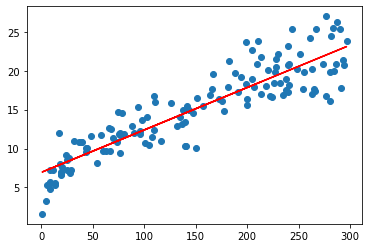

In [16]:
# plot the predictions of model 
plt.scatter(X_train, y_train)
plt.plot(X_train, 6.9487+0.0545*X_train, 'r')
plt.show()

- Above plot, depicts the predicted model with co-efficient `y_pred = 6.9487 + 0.0545*X_train`

## Residual Analysis

In [17]:
y_train_pred = lr_model.predict(X_train_sm)

In [18]:
res = y_train - y_train_pred

### Assumptions on Simple Linear Regression :
- histogram depicts the error terms are normally distributed
- look for any patterns in residuals(we should be able to identify any)

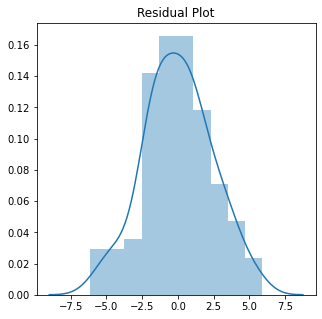

In [19]:
plt.figure(figsize=(5,5))
sns.distplot(res)
plt.title('Residual Plot')
plt.show()

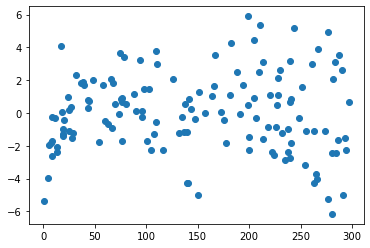

In [20]:
plt.scatter(X_train, res)
plt.show()

### Predictions and Evaluating model on test set

In [21]:
# make prediction on test set (y_test_pred)
# evaluate the model, r-squared on the test
X_test_sm = sm.add_constant(X_test)

#pred on y_test 
y_test_pred = lr_model.predict(X_test_sm)

In [22]:
r2 = r2_score(y_true=y_test,y_pred = y_test_pred)
r2

0.7921031601245658

In [23]:
r2 = r2_score(y_true=y_train,y_pred = y_train_pred)
r2

0.8157933136480389

In [24]:
# mean squared error
mean_squared_error(y_true=y_test,y_pred = y_test_pred)

4.077556371826956

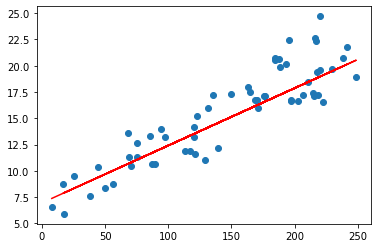

In [25]:
# plot the predictions of model on test set
plt.scatter(X_test, y_test)
plt.plot(X_test, y_test_pred, 'r')
plt.show()

### Linear regression using Sklearn

In [34]:
X_train_lm, y_train_lm, X_test_lm,y_test_lm = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [35]:
X_train_lm.shape

(140,)

In [36]:
y_train_lm.shape

(60,)

In [37]:
X_train_lm = X_train_lm.values.reshape(-1,1)
X_test_lm = X_test_lm.values.reshape(-1,1)

In [38]:
from sklearn.linear_model import LinearRegression

# Representing LinearRegression as lr(Creating LinearRegression Object)
lm = LinearRegression()

# Fit the model using lr.fit()
lm.fit(X_train_lm, y_train_lm)

ValueError: Found input variables with inconsistent numbers of samples: [140, 60]

In [39]:
print(lm.intercept_)
print(lm.coef_)

AttributeError: 'LinearRegression' object has no attribute 'intercept_'

In [40]:
y_train_pred = lm.predict(X_train_lm)
y_test_pred = lm.predict(X_test_lm)

NotFittedError: This LinearRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [41]:
print(r2_score(y_true=y_train_lm, y_pred=y_train_pred))
print(r2_score(y_true=y_test_lm, y_pred=y_test_pred))

ValueError: Found input variables with inconsistent numbers of samples: [60, 140]